In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

In [3]:
hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]


for hhid in hhids: 
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_added2/added_hhdata_{}_2.csv'.format(hhid), index_col=0)
    st = []
    ct = 0
    for idx, row in df.iterrows():
        if row.GH < 2000 and row.GH > -1000:
            st.append(row)
        else:
            ct += 1

    # print(ct)
    df = pd.DataFrame(data=st, columns=df.columns)
    features = ['use', 'temperature', 'cloud_cover','wind_speed','is_weekday','ac_hour','ac_week','month','hour']



    Y = list(df.ac)[1:]
    Y.append(df.ac.iloc[0])
    Y = np.array(Y)

    X = df[features]
    X = np.array(X)
    X.shape

#     temp_df = pd.DataFrame(data=X, columns=features)
#     temp_df['y_GH'] = Y
#     values = temp_df.values

#     # normalize features
#     scaler = MinMaxScaler()
#     y_gt = values[:,-1:]
#     scaled = scaler.fit_transform(values)
#     values = scaled

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.10,
                                                        random_state=666)


    classifiers = [
        linear_model.Ridge(alpha=1.0, random_state=0),
        linear_model.Lasso(alpha=0.55, random_state=0),
        linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06),
        linear_model.LassoLars(alpha=0.55),
        linear_model.LinearRegression(),
        ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        tree.DecisionTreeRegressor(),
        neural_network.MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    ]


    print('Start :: Find the best model for this household...')
    for clf in classifiers:
        clf.fit(X_train, Y_train)
        print(clf)
        yhat = clf.predict(X_test)
        scores = cross_val_score(clf, X_train, Y_train)
        rmse = np.sqrt(mean_squared_error(Y_test, yhat))
        mae = mean_absolute_error(Y_test, yhat)
        print('RMSE =>', rmse)
        print('MAE =>', mae)
        print('CV Score =>', scores)
        model_dict = {
            'name': clf.__class__.__name__,
            'rmse': rmse,
            'mae': mae,
        }
        result[hhid].append(model_dict)
        print('')

Start :: Process on household 26...
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 0.8008500794640053
MAE => 0.5335777422727929
CV Score => [0.57568481 0.58113012 0.57872814]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 0.9804599112613137
MAE => 0.7502893109754541
CV Score => [0.3606953  0.36893907 0.35751678]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 0.8008423913221219
MAE => 0.5336388287999455
CV Score => [0.57570012 0.5811119  0.5787562 ]

LassoLars(alpha=0.55, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path

RMSE => 0.5739979624630008
MAE => 0.3363560335916309
CV Score => [0.74031097 0.69160948 0.72724082]

Start :: Process on household 86...
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 0.7971803279022032
MAE => 0.5358676226283873
CV Score => [0.58002188 0.59002161 0.58430978]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 0.9804599112613137
MAE => 0.7502893109754541
CV Score => [0.3606953  0.36893907 0.35751678]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 0.797185387922839
MAE => 0.5359232356668078
CV Score => [0.58002133 0.58998959 0.584361

RMSE => 0.6034746168111332
MAE => 0.36138978572329206
CV Score => [0.72486982 0.76405918 0.69512777]

Start :: Process on household 101...
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 0.8074217966115849
MAE => 0.5358789428543522
CV Score => [0.56988899 0.57966882 0.5744507 ]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 0.9804599112613137
MAE => 0.7502893109754541
CV Score => [0.3606953  0.36893907 0.35751678]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 0.8074149937894747
MAE => 0.5359246309620913
CV Score => [0.56989991 0.57963974 0.574

RMSE => 0.5873319075761277
MAE => 0.3491752126532257
CV Score => [0.7329046  0.7723193  0.74631023]

Start :: Process on household 187...
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 0.8066545918859083
MAE => 0.536375001206368
CV Score => [0.57041135 0.57954919 0.57457508]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 0.9804599112613137
MAE => 0.7502893109754541
CV Score => [0.3606953  0.36893907 0.35751678]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 0.806649001227073
MAE => 0.5364140340617111
CV Score => [0.57042121 0.57952604 0.574605

In [4]:
final = []
for k, v in result.items():
    for i in result[k]:
        final.append([str(k), i['name'], i['rmse'], i['mae']])
col = ['household_id', 'alg', 'RMSE', 'MAE']
final = pd.DataFrame(data=final, columns=col)
final.to_csv('GHI.csv')

In [5]:
final

,household_id,alg,RMSE,MAE
0,26,Ridge,0.800850,0.533578
1,26,Lasso,0.980460,0.750289
2,26,BayesianRidge,0.800842,0.533639
3,26,LassoLars,1.222810,0.955265
4,26,LinearRegression,0.800851,0.533573
5,26,RandomForestRegressor,0.551231,0.282125
6,26,DecisionTreeRegressor,0.709738,0.313295
7,26,MLPRegressor,0.624553,0.396181
8,59,Ridge,0.792410,0.531601
9,59,Lasso,0.980460,0.750289


In [6]:
gb = final.groupby('alg')

In [7]:
N = 9
ind = range(N)
mean = list(gb['RMSE'].describe()['mean'])
mean.append()
std = list(gb['RMSE'].describe()['std'])
std.append()

In [8]:
print(mean, std)

[0.8032440566422382, 0.7542955467006577, 0.9802921155468349, 1.221884180979469, 0.8032502480188054, 0.5987338327841599, 0.5578596022269633, 0.8032497917581736] [0.005070121440336352, 0.027900815637330555, 0.0005306166393680625, 0.002927961575633265, 0.005071852968902668, 0.01578632964048594, 0.006784621596013352, 0.0050717248336803345]


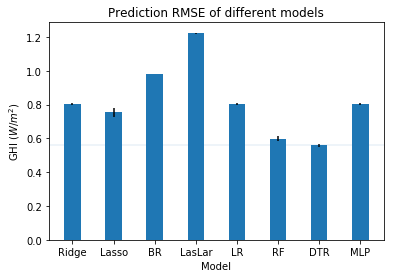

In [9]:
p1 = plt.bar(ind, mean, 0.4, yerr=std)

plt.ylabel('GHI ($W/m^2$)')
plt.title('Prediction RMSE of different models')
plt.xlabel('Model')
plt.xticks(ind, ('Ridge', 'Lasso','BR' ,'LasLar', 'LR', 'RF', 'DTR', 'MLP','GPR'))
# plt.yticks(np.arange(50, 2))
plt.axhline(y=gb['RMSE'].describe()['mean']['RandomForestRegressor'], linewidth=0.15)
plt.savefig('ghi.png')